In [1]:
import networkx as nx
import umap
import matplotlib.pyplot as plt

/home/guilherme/Python/karateclub/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
frequent_subgraph = []
node_labels = []
edge_labels = []
suports = []
G = None
with open("out.txt") as file:
    for line in file:
        if (line.startswith("t")):
            if not(G is None):
                frequent_subgraph.append(G)
                node_labels.append(node_label)
                edge_labels.append(edge_label)
                suports.append(suport)
            G = nx.Graph()
            node_label = {}
            edge_label = {}
            suport = []
        if (line.startswith("v")):
            values = line.split(' ')
            G.add_node(int(values[1]))
            node_label[int(values[1])] = chr( 64 + int(values[2]))
        if (line.startswith("e")):
            values = line.split(' ')
            G.add_edge(int(values[1]), int(values[2]), weight=int(values[2]))
            if (values[3].strip() == '0'):
                edge_label[(int(values[1]), int(values[2]))] = 'Low'
            elif (values[3].strip() == '1'):
                edge_label[(int(values[1]), int(values[2]))] = 'Medium'
            else:
                edge_label[(int(values[1]), int(values[2]))] = 'High'
        if (line.startswith("x")):
            suport = [int(ele) for ele in line.replace("x ", "").split()]

In [3]:
def plot_graph(index, graphs=frequent_subgraph, node_labels=node_labels, edge_labels=edge_labels, suports=suports):
    plt.figure()  
    plt.title("Suport: " + str(len(suports[index])))
    pos = nx.planar_layout(frequent_subgraph[index])
    nx.draw(frequent_subgraph[index], pos, labels=node_labels[index], node_shape="s",bbox=dict(facecolor="orange", edgecolor='black', boxstyle='round,pad=0.2'))
    nx.draw_networkx_edge_labels(frequent_subgraph[index], pos, edge_labels=edge_labels[index], font_color='green', verticalalignment='top')
    print(nx.to_latex_raw(frequent_subgraph[index], pos, node_label=node_labels[index], edge_label=edge_labels[index], edge_label_options='above'))
    plt.show()

In [4]:
import copy
from karateclub import Graph2Vec, IGE, NetLSD, SF
model = SF()
model.fit(copy.deepcopy(frequent_subgraph) )

In [5]:
model.get_embedding().shape

(1179, 128)

In [6]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(model.get_embedding())

/home/guilherme/Python/karateclub/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


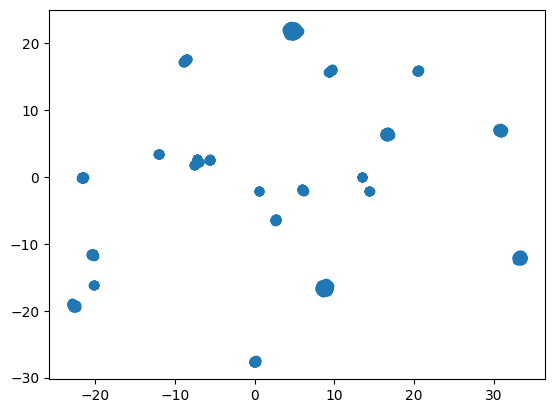

In [7]:
import matplotlib.pyplot as plt
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])

In [8]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(embedding)

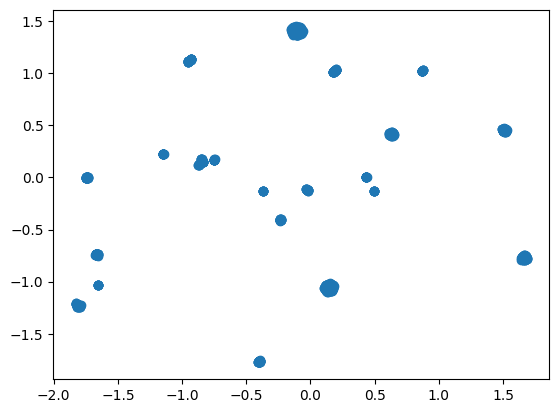

In [9]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [10]:
def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    # The probability of a point belonging to its labeled cluster determines
    # the size of its marker
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_index = np.where(labels == k)[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()

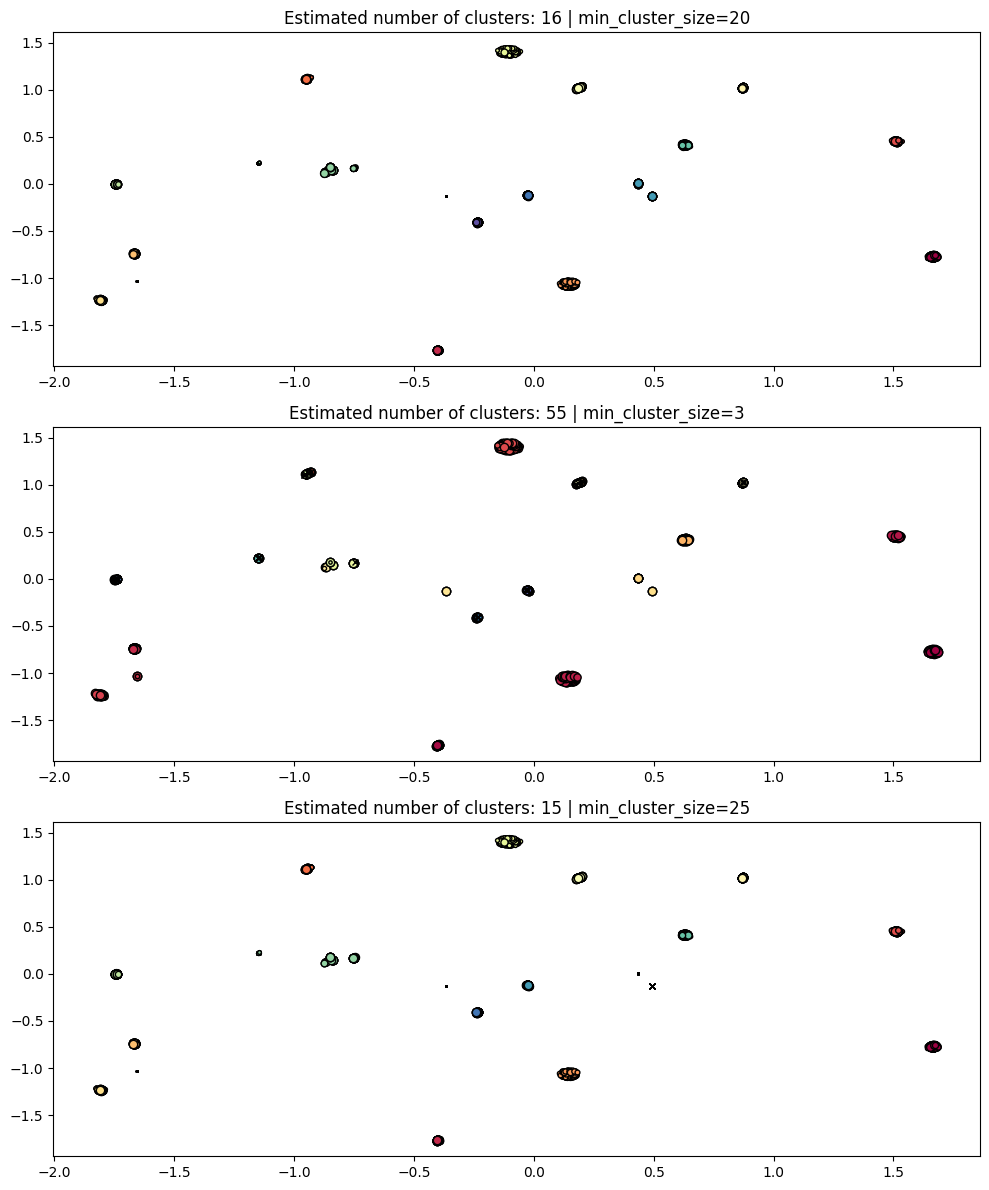

In [11]:
import numpy as np
from sklearn.cluster import DBSCAN, HDBSCAN
PARAM = ({"min_cluster_size": 20}, {"min_cluster_size": 3}, {"min_cluster_size": 25})
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    hdb = HDBSCAN(**param).fit(X)
    labels = hdb.labels_

    plot(X, labels, hdb.probabilities_, param, ax=axes[i])

In [12]:
hdb = HDBSCAN(min_cluster_size=15).fit(X)
labels = hdb.labels_

In [13]:
set(hdb.labels_)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [14]:
unique, counts = np.unique(hdb.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 115,
 1: 40,
 2: 81,
 3: 43,
 4: 202,
 5: 50,
 6: 76,
 7: 27,
 8: 33,
 9: 233,
 10: 42,
 11: 38,
 12: 18,
 13: 88,
 14: 20,
 15: 33,
 16: 40}

In [15]:
np.where(labels ==  -1)

(array([], dtype=int64),)

  \begin{tikzpicture}
      \draw
        (-1.0, -0.333) node (0){G}
        (0.778, -0.333) node (1){H}
        (0.333, 0.111) node (2){I}
        (-0.111, 0.556) node (3){Q};
      \begin{scope}[-]
        \draw (0) to node[] {Medium} (1);
        \draw (0) to node[] {Low} (3);
        \draw (1) to node[] {Low} (2);
        \draw[loop,] (3) to node[] {Low} (3);
      \end{scope}
    \end{tikzpicture}



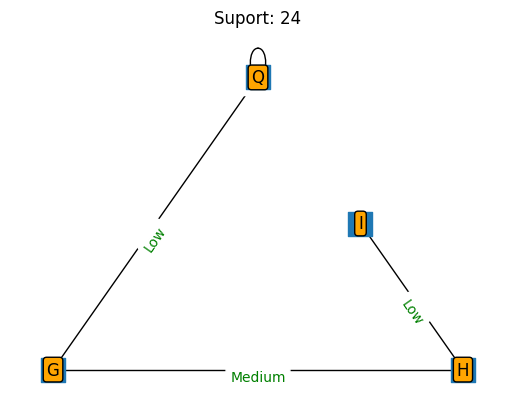

In [16]:
plot_graph(280)

  \begin{tikzpicture}
      \draw
        (-1.0, -0.333) node (0){C}
        (0.778, -0.333) node (1){G}
        (0.333, 0.111) node (2){M}
        (-0.111, 0.556) node (3){H};
      \begin{scope}[-]
        \draw (0) to node[] {High} (1);
        \draw (0) to node[] {Low} (3);
        \draw[loop,] (1) to node[] {High} (1);
        \draw (1) to node[] {Medium} (2);
        \draw[loop,] (3) to node[] {Medium} (3);
      \end{scope}
    \end{tikzpicture}



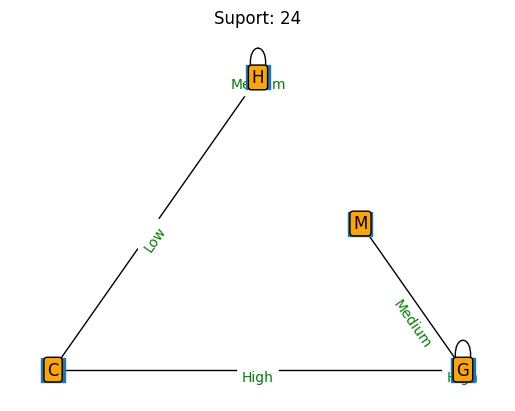

In [17]:
plot_graph(1017)